# Download dataset and custom Python modules

In [ ]:
# Clone repo containing MNIST data and the neural network modules
!git clone -b master https://github.com/papir805/Stanford-ML-Class.git

# Important Python Libraries for Data Science

In [3]:
# For organizing and manipulating data
import numpy as np

# For Plotting
import matplotlib.pyplot as plt
import cv2

# Importing Custom Modules for Neural Networks and Working with MNIST

In [4]:
# Used to identify file paths for our datasets and custom modules
import os
import sys

# Specify path of cloned GitHub directory
gh_dir = os.getcwd()+'/Stanford-ML-Class'

# # Specify Python should look at the parent directory
# # to import custom modules
# sys.path.insert(0, '../')

# Specify Python should look at the cloned gh directory
# to import custom modules
sys.path.insert(0, gh_dir)

# Import custom neural network modules
from neural_network_scripts import mnist_loader, network, image_processing, for_visualizations

In [5]:
# import importlib
# importlib.reload(network)
# importlib.reload(image_processing)

# Read Data

In [6]:
# Load dataset
data_path = gh_dir+"/data/mnist.pkl.gz"

# Load training data.  Testing data isn't needed for this notebook
training_data, _, _ = \
mnist_loader.load_data_wrapper(data_path)

# Visualizing the Dataset

In [7]:
# Set colors for visualizations
five_color = "orange"
zero_color = "blue"

# Set range of pixel indices for visualizations
pxl_idx = np.arange(0, 784, 1)

### The First Digit is a 5

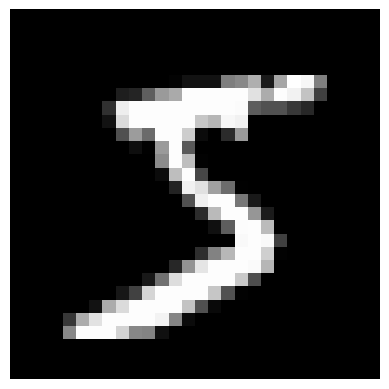

In [8]:
first_digit = training_data[0][0]

image_processing.print_image(first_digit)

#### Grayscale Values as a Function of Pixel Index

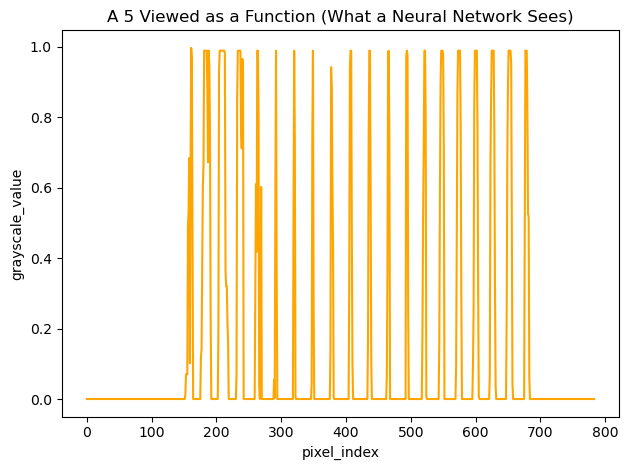

In [9]:
fig, ax = plt.subplots(1,1)

ax.plot(pxl_idx, first_digit.reshape(784), color=five_color)
ax.set_title("A 5 Viewed as a Function (What a Neural Network Sees)")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value')

plt.tight_layout();

In [40]:
from matplotlib.gridspec import GridSpec

Text(0.5, 1.0, 'What a human sees')

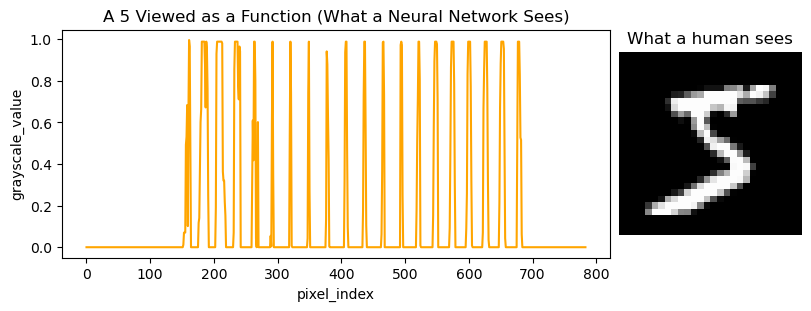

In [71]:
fig = plt.figure(layout="constrained", figsize=(8,3))
gs = GridSpec(1, 4, figure=fig)
ax1 = fig.add_subplot(gs[0,:-1])
ax2 = fig.add_subplot(gs[0,-1])

ax1.plot(pxl_idx, first_digit.reshape(784), color=five_color)
ax1.set_title("A 5 Viewed as a Function (What a Neural Network Sees)")
ax1.set_xlabel('pixel_index')
ax1.set_ylabel('grayscale_value')

image_processing.print_image(first_digit, ax=ax2)
ax2.set_title("What a Human Sees");

### The Second Digit is a 0

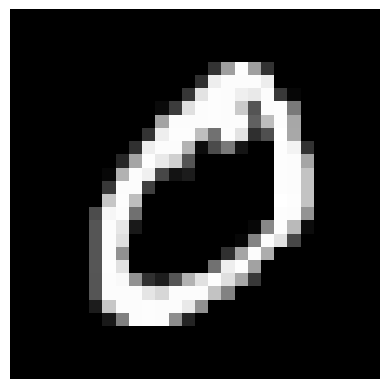

In [12]:
second_digit = training_data[1][0]

image_processing.print_image(second_digit.reshape(28,28))

#### Grayscale Values as a Function of Pixel Index

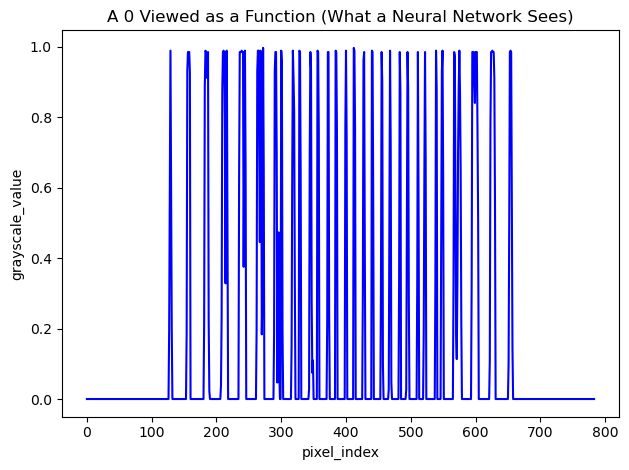

In [13]:
fig, ax = plt.subplots(1,1)

ax.plot(pxl_idx, second_digit.reshape(784), color=zero_color)
ax.set_title("A 0 Viewed as a Function (What a Neural Network Sees)")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value')

plt.tight_layout();

Text(0.5, 1.0, 'What a human sees')

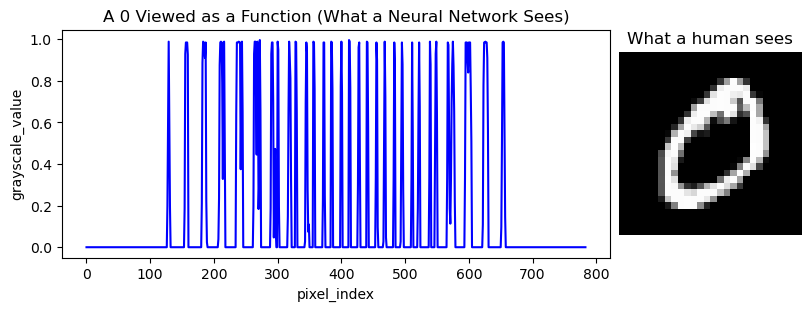

In [72]:
fig = plt.figure(layout="constrained", figsize=(8,3))
gs = GridSpec(1, 4, figure=fig)
ax1 = fig.add_subplot(gs[0,:-1])
ax2 = fig.add_subplot(gs[0,-1])

ax1.plot(pxl_idx, second_digit.reshape(784), color=zero_color)
ax1.set_title("A 0 Viewed as a Function (What a Neural Network Sees)")
ax1.set_xlabel('pixel_index')
ax1.set_ylabel('grayscale_value')

image_processing.print_image(second_digit, ax=ax2)
ax2.set_title("What a Human sees");

## Several Fives

In [14]:
fives = list()

for sample in training_data:
    if sample[1][5] == 1:
        fives.append(sample[0])
    if len(fives) == 3:
        break

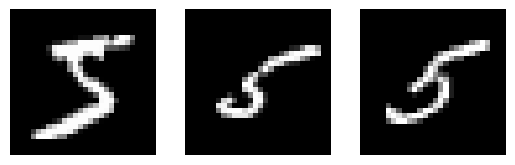

In [15]:
fig, ax = plt.subplots(1,3)

for i, five in enumerate(fives):
    image_processing.print_image(five.reshape(28, 28), ax = ax[i])

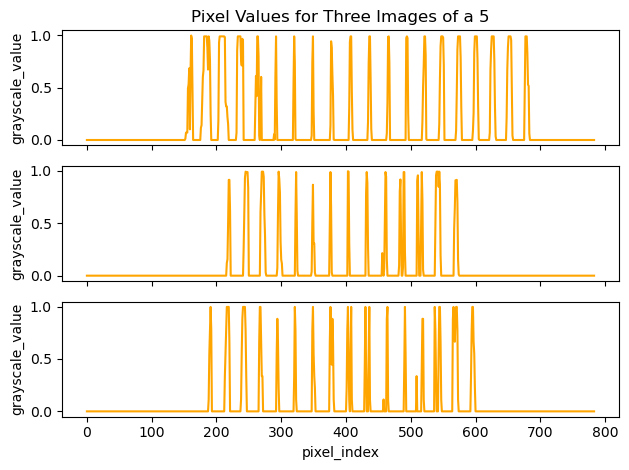

In [16]:
fig, ax = plt.subplots(3, 1, sharex = True)

for i, five in enumerate(fives):
    ax[i].plot(
        pxl_idx, 
        five.reshape(784), 
        color=five_color
    )
    ax[i].set_ylabel('grayscale_value');

ax[0].set_title("Pixel Values for Three Images of a 5")
ax[2].set_xlabel('pixel_index')

plt.tight_layout();

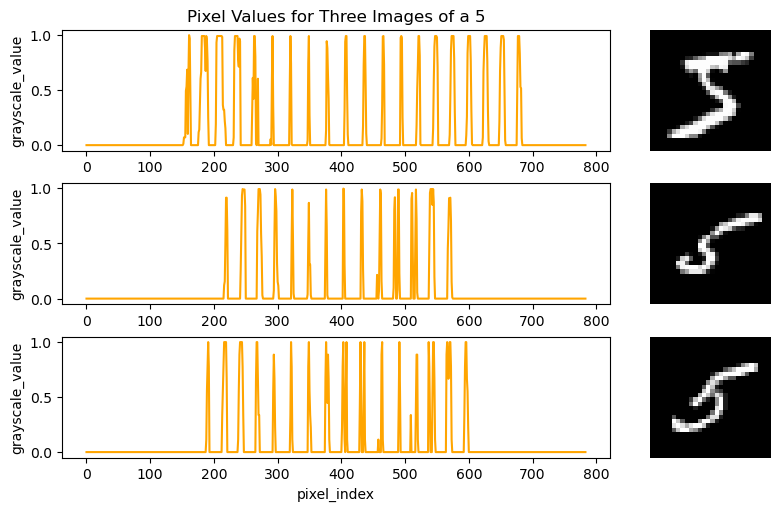

In [75]:
fig = plt.figure(layout="constrained", figsize=(8,5))
gs = GridSpec(3, 4, figure=fig)
ax = np.empty((3,2), dtype=plt.Axes)
ax[0,0] = fig.add_subplot(gs[0,:-1])
ax[0,1] = fig.add_subplot(gs[0,-1])
ax[1,0] = fig.add_subplot(gs[1,:-1])
ax[1,1] = fig.add_subplot(gs[1,-1])
ax[2,0] = fig.add_subplot(gs[2,:-1])
ax[2,1] = fig.add_subplot(gs[2,-1])

for i, five in enumerate(fives):
    ax[i][0].plot(
        pxl_idx, 
        five.reshape(784), 
        color=five_color
    )
    ax[i][0].set_ylabel('grayscale_value')
    image_processing.print_image(five.reshape(28, 28), ax = ax[i][1])

ax[0][0].set_title("Pixel Values for Three Images of a 5")
ax[2][0].set_xlabel('pixel_index');

## Several Zeros

In [21]:
zeros = list()

for sample in training_data:
    if sample[1][0] == 1:
        zeros.append(sample[0])
    if len(zeros) == 3:
        break

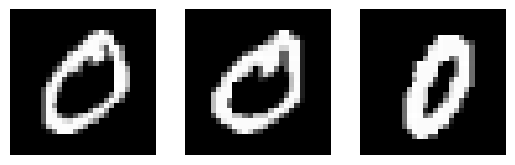

In [22]:
fig, ax = plt.subplots(1,3)

for i, zero in enumerate(zeros):
    image_processing.print_image(zero.reshape(28, 28), ax = ax[i])

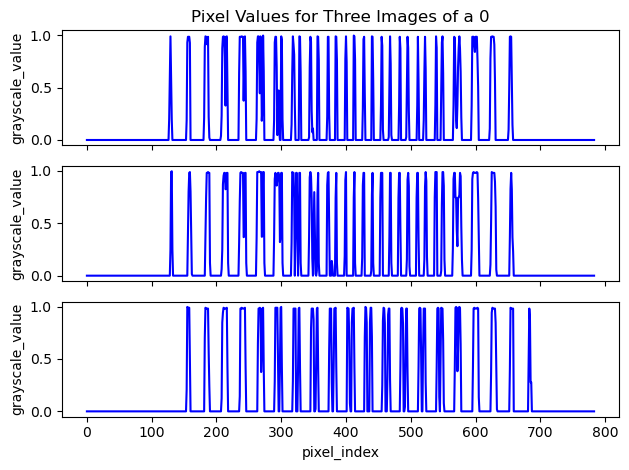

In [23]:
fig, ax = plt.subplots(3, 1, sharex = True)

for i, zero in enumerate(zeros):
    ax[i].plot(
        pxl_idx, 
        zero.reshape(784), 
        color=zero_color
    )
    ax[i].set_ylabel('grayscale_value')

ax[0].set_title("Pixel Values for Three Images of a 0")
ax[2].set_xlabel('pixel_index')

plt.tight_layout();

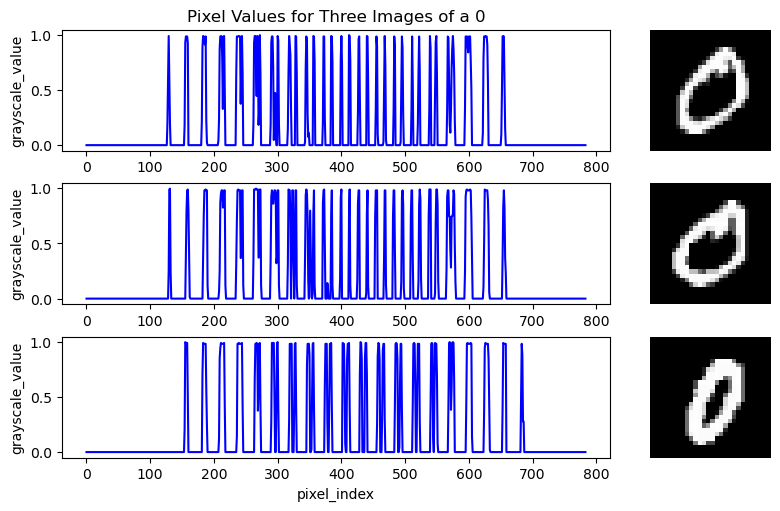

In [76]:
fig = plt.figure(layout="constrained", figsize=(8,5))
gs = GridSpec(3, 4, figure=fig)
ax = np.empty((3,2), dtype=plt.Axes)
ax[0,0] = fig.add_subplot(gs[0,:-1])
ax[0,1] = fig.add_subplot(gs[0,-1])
ax[1,0] = fig.add_subplot(gs[1,:-1])
ax[1,1] = fig.add_subplot(gs[1,-1])
ax[2,0] = fig.add_subplot(gs[2,:-1])
ax[2,1] = fig.add_subplot(gs[2,-1])

for i, zero in enumerate(zeros):
    ax[i][0].plot(
        pxl_idx, 
        zero.reshape(784), 
        color=zero_color
    )
    ax[i][0].set_ylabel('grayscale_value')
    image_processing.print_image(zero.reshape(28, 28), ax = ax[i][1])

ax[0][0].set_title("Pixel Values for Three Images of a 0")
ax[2][0].set_xlabel('pixel_index');

## Comparing a Five and a Zero

In [29]:
min_idx = 100
max_idx = 300
zoom_idx_range = np.arange(min_idx, max_idx, 1)
zoom_idx_diff = max_idx - min_idx

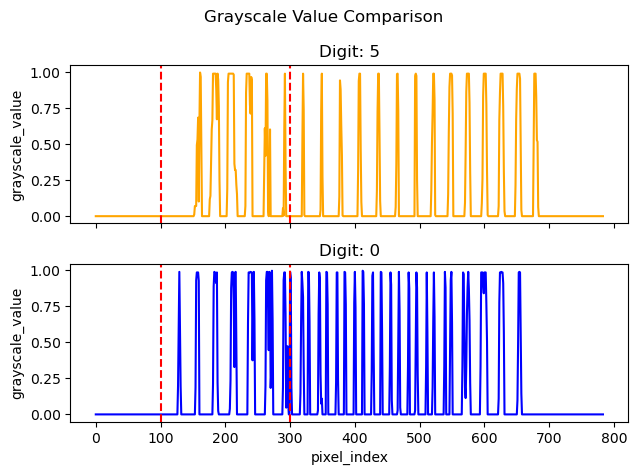

In [36]:
fig, ax = plt.subplots(2,1, sharex=True)

fig.suptitle('Grayscale Value Comparison')

ax[0].plot(pxl_idx, first_digit.reshape(784), color=five_color)
ax[0].axvline(x = min_idx, color='red', linestyle="--")
ax[0].axvline(x = max_idx, color='red', linestyle="--")
ax[0].set_title("Digit: 5")
# ax[0].set_xlabel('pixel_index')
ax[0].set_ylabel('grayscale_value')

ax[1].plot(pxl_idx, second_digit.reshape(784), color=zero_color)
ax[1].axvline(x = min_idx, color='red', linestyle="--")
ax[1].axvline(x = max_idx, color='red', linestyle="--")
ax[1].set_title("Digit: 0")
ax[1].set_xlabel('pixel_index')
ax[1].set_ylabel('grayscale_value')

plt.tight_layout();

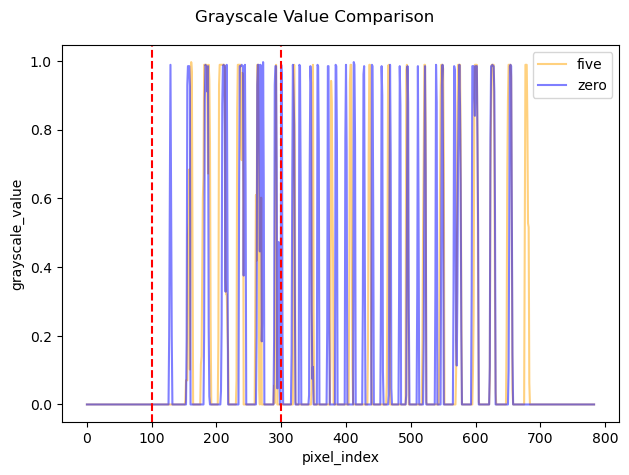

In [35]:
fig, ax = plt.subplots(1,1)

ax.plot(
    pxl_idx,
    first_digit.reshape(784),
    color=five_color,
    label='five',
    alpha=0.5
)

ax.plot(
    pxl_idx, 
    second_digit.reshape(784),
    color=zero_color, 
    label='zero', 
    alpha=0.5
)

ax.axvline(x = min_idx, color='red', linestyle="--")
ax.axvline(x = max_idx, color='red', linestyle="--")

fig.suptitle('Grayscale Value Comparison')
#ax.set_title("Color values for a single 0 from the dataset")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value')
ax.legend()

plt.tight_layout();

### Zooming in on a Pixel Range

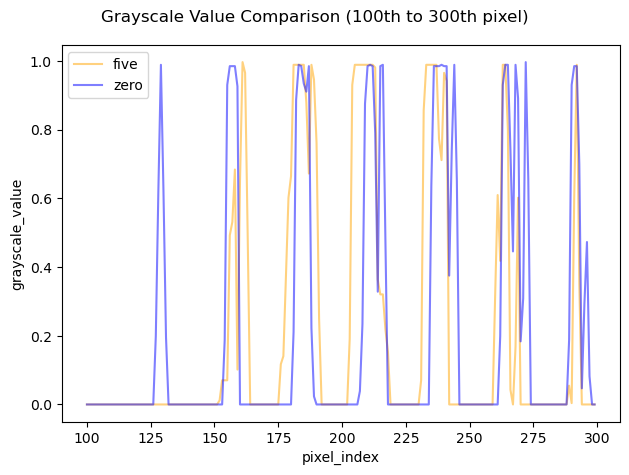

In [38]:
fig, ax = plt.subplots(1,1)

ax.plot(
    zoom_idx_range, 
    first_digit[zoom_idx_range].reshape(zoom_idx_diff), 
    color=five_color, 
    label='five', 
    alpha=0.5
)

ax.plot(
    zoom_idx_range, 
    second_digit[zoom_idx_range].reshape(zoom_idx_diff),
    color=zero_color,
    label='zero',
    alpha=0.5
)

fig.suptitle(f'Grayscale Value Comparison ({min_idx}th to {max_idx}th pixel)')
#ax.set_title("Color values for a single 0 from the dataset")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value')
ax.legend(loc="upper left")

plt.tight_layout();

## Aggregating Grayscale Values

In [58]:
# importlib.reload(network)
# importlib.reload(image_processing)
# importlib.reload(plotting)

In [59]:
images = for_visualizations.get_and_categorize_images(training_data)
fives = images[5]
zeros = images[0]

five_sums = np.array(fives).reshape(len(fives), 784).sum(axis=0)
zero_sums = np.array(zeros).reshape(len(zeros), 784).sum(axis=0)

five_avgs = np.array(fives).reshape(len(fives), 784).mean(axis=0)
zero_avgs = np.array(zeros).reshape(len(zeros), 784).mean(axis=0)

### Sum of Grayscale Values

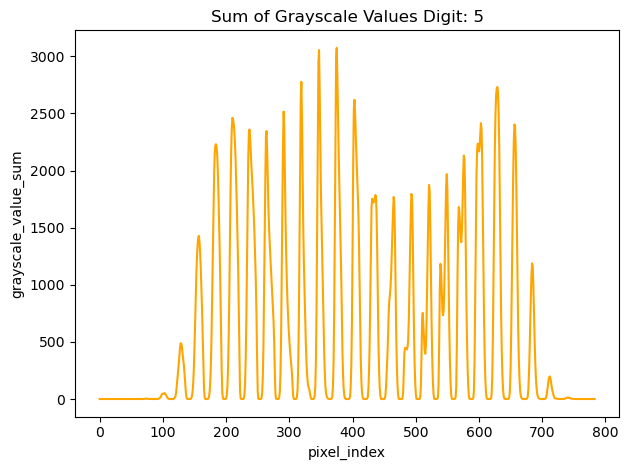

In [60]:
fig, ax = plt.subplots(1,1)

ax.plot(pxl_idx, five_sums, color=five_color)
ax.set_title("Sum of Grayscale Values Digit: 5")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value_sum')

plt.tight_layout();

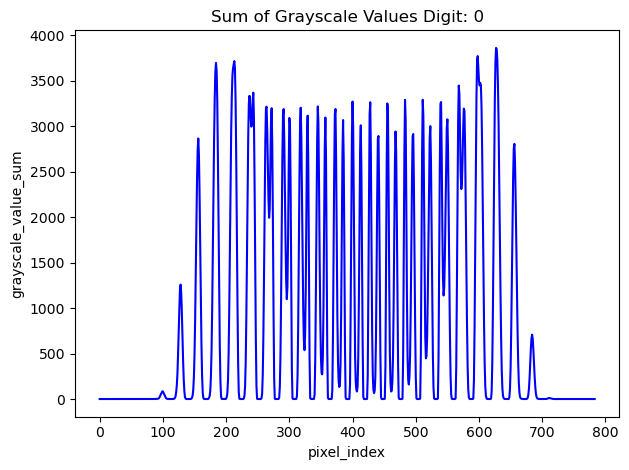

In [61]:
fig, ax = plt.subplots(1,1)

ax.plot(pxl_idx, zero_sums, color=zero_color)
ax.set_title("Sum of Grayscale Values Digit: 0")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value_sum')

plt.tight_layout();

#### Comparisons

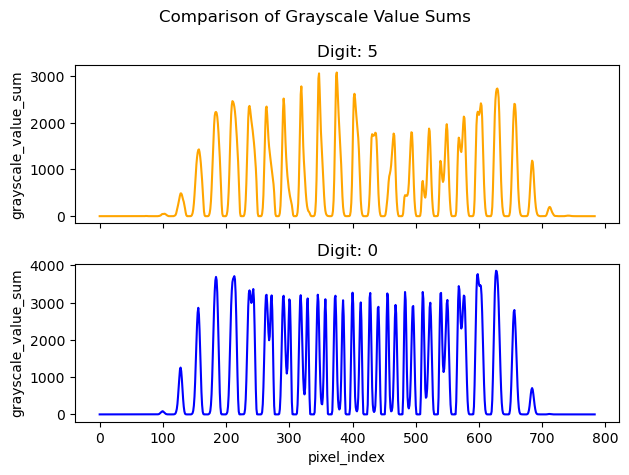

In [62]:
fig, ax = plt.subplots(2,1, sharex=True)

fig.suptitle('Comparison of Grayscale Value Sums')

ax[0].plot(pxl_idx, five_sums, color=five_color)
ax[0].set_title("Digit: 5")
#ax[0].set_xlabel('pixel_index')
ax[0].set_ylabel('grayscale_value_sum');

ax[1].plot(pxl_idx, zero_sums, color=zero_color)
ax[1].set_title("Digit: 0")
ax[1].set_xlabel('pixel_index')
ax[1].set_ylabel('grayscale_value_sum')

plt.tight_layout();

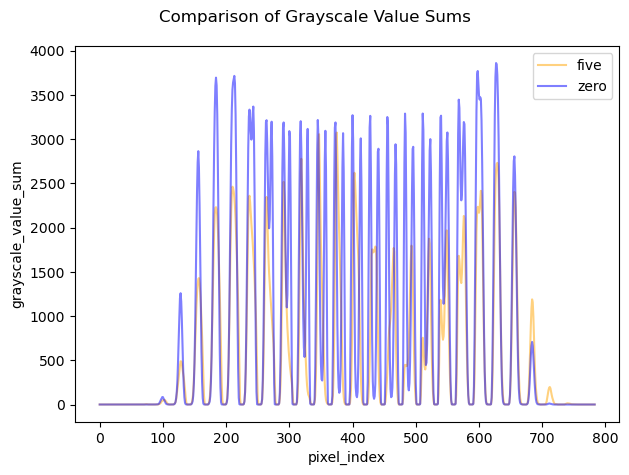

In [69]:
fig, ax = plt.subplots(1,1)

fig.suptitle('Comparison of Grayscale Value Sums')

ax.plot(pxl_idx, five_sums, label='five', color=five_color, alpha=0.5)
ax.plot(pxl_idx, zero_sums, label='zero', color=zero_color, alpha=0.5)
#ax.set_title("Color values for all zeros from the dataset")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value_sum')
ax.legend()

plt.tight_layout();

### Average Grayscale Values

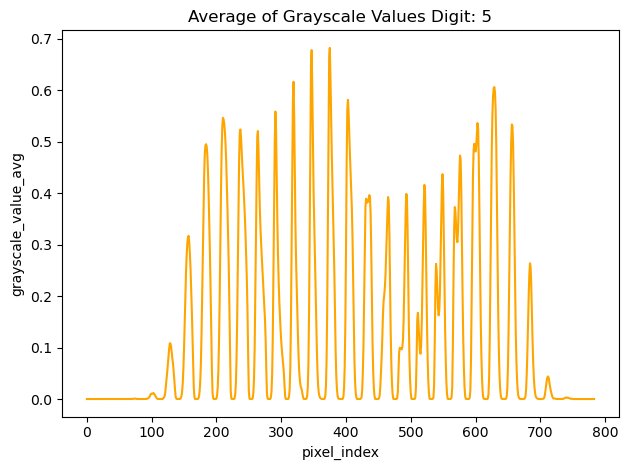

In [64]:
fig, ax = plt.subplots(1,1)

ax.plot(pxl_idx, five_avgs, color=five_color)
ax.set_title("Average of Grayscale Values Digit: 5")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value_avg')

plt.tight_layout();

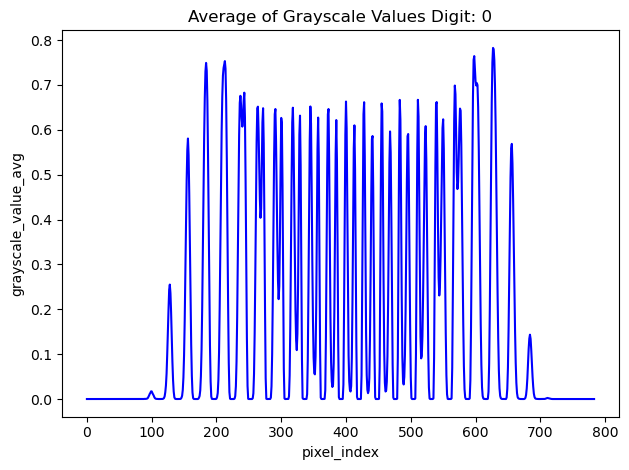

In [65]:
fig, ax = plt.subplots(1,1)

ax.plot(pxl_idx, zero_avgs, color=zero_color)
ax.set_title("Average of Grayscale Values Digit: 0")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value_avg')

plt.tight_layout();

#### Comparisons

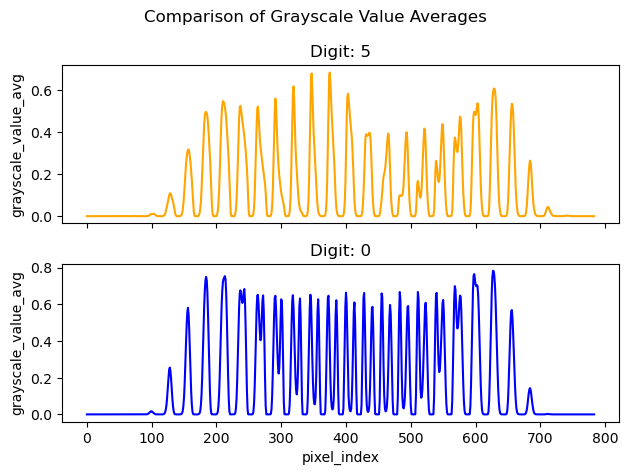

In [66]:
fig, ax = plt.subplots(2,1, sharex=True)

fig.suptitle('Comparison of Grayscale Value Averages')

ax[0].plot(pxl_idx, five_avgs, color=five_color)
ax[0].set_title("Digit: 5")
#ax[0].set_xlabel('pixel_index')
ax[0].set_ylabel('grayscale_value_avg');

ax[1].plot(pxl_idx, zero_avgs, color=zero_color)
ax[1].set_title("Digit: 0")
ax[1].set_xlabel('pixel_index')
ax[1].set_ylabel('grayscale_value_avg')

plt.tight_layout();

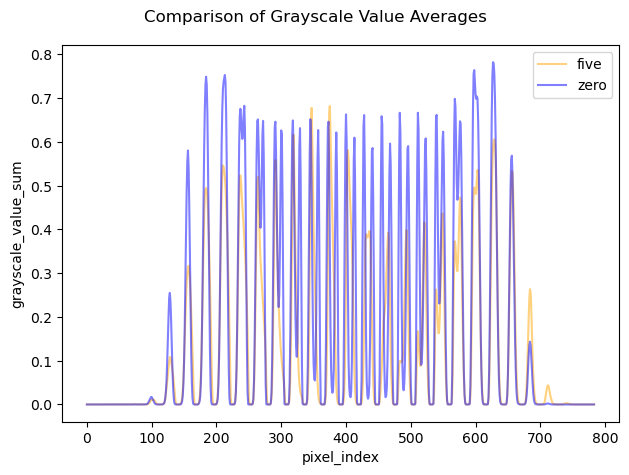

In [67]:
fig, ax = plt.subplots(1,1)

fig.suptitle('Comparison of Grayscale Value Averages')

ax.plot(pxl_idx, five_avgs, label='five', color=five_color, alpha=0.5)
ax.plot(pxl_idx, zero_avgs, label='zero', color=zero_color, alpha=0.5)
#ax.set_title("Color values for all zeros from the dataset")
ax.set_xlabel('pixel_index')
ax.set_ylabel('grayscale_value_sum')
plt.legend()

plt.tight_layout();

The end